## Context
A Tour & Travels Company Is Offering Travel Insurance Package To Their Customers.
The New Insurance Package Also Includes Covid Cover.
The Company Requires To Know The Which Customers Would Be Interested To Buy It Based On Its Database History.
The Insurance Was Offered To Some Of The Customers In 2019 And The Given Data Has Been Extracted From The Performance/Sales Of The Package During That Period.
The Data Is Provided For Almost 2000 Of Its Previous Customers And You Are Required To Build An Intelligent Model That Can Predict If The Customer Will Be Interested To Buy The Travel Insurance Package Based On Certain Columns.

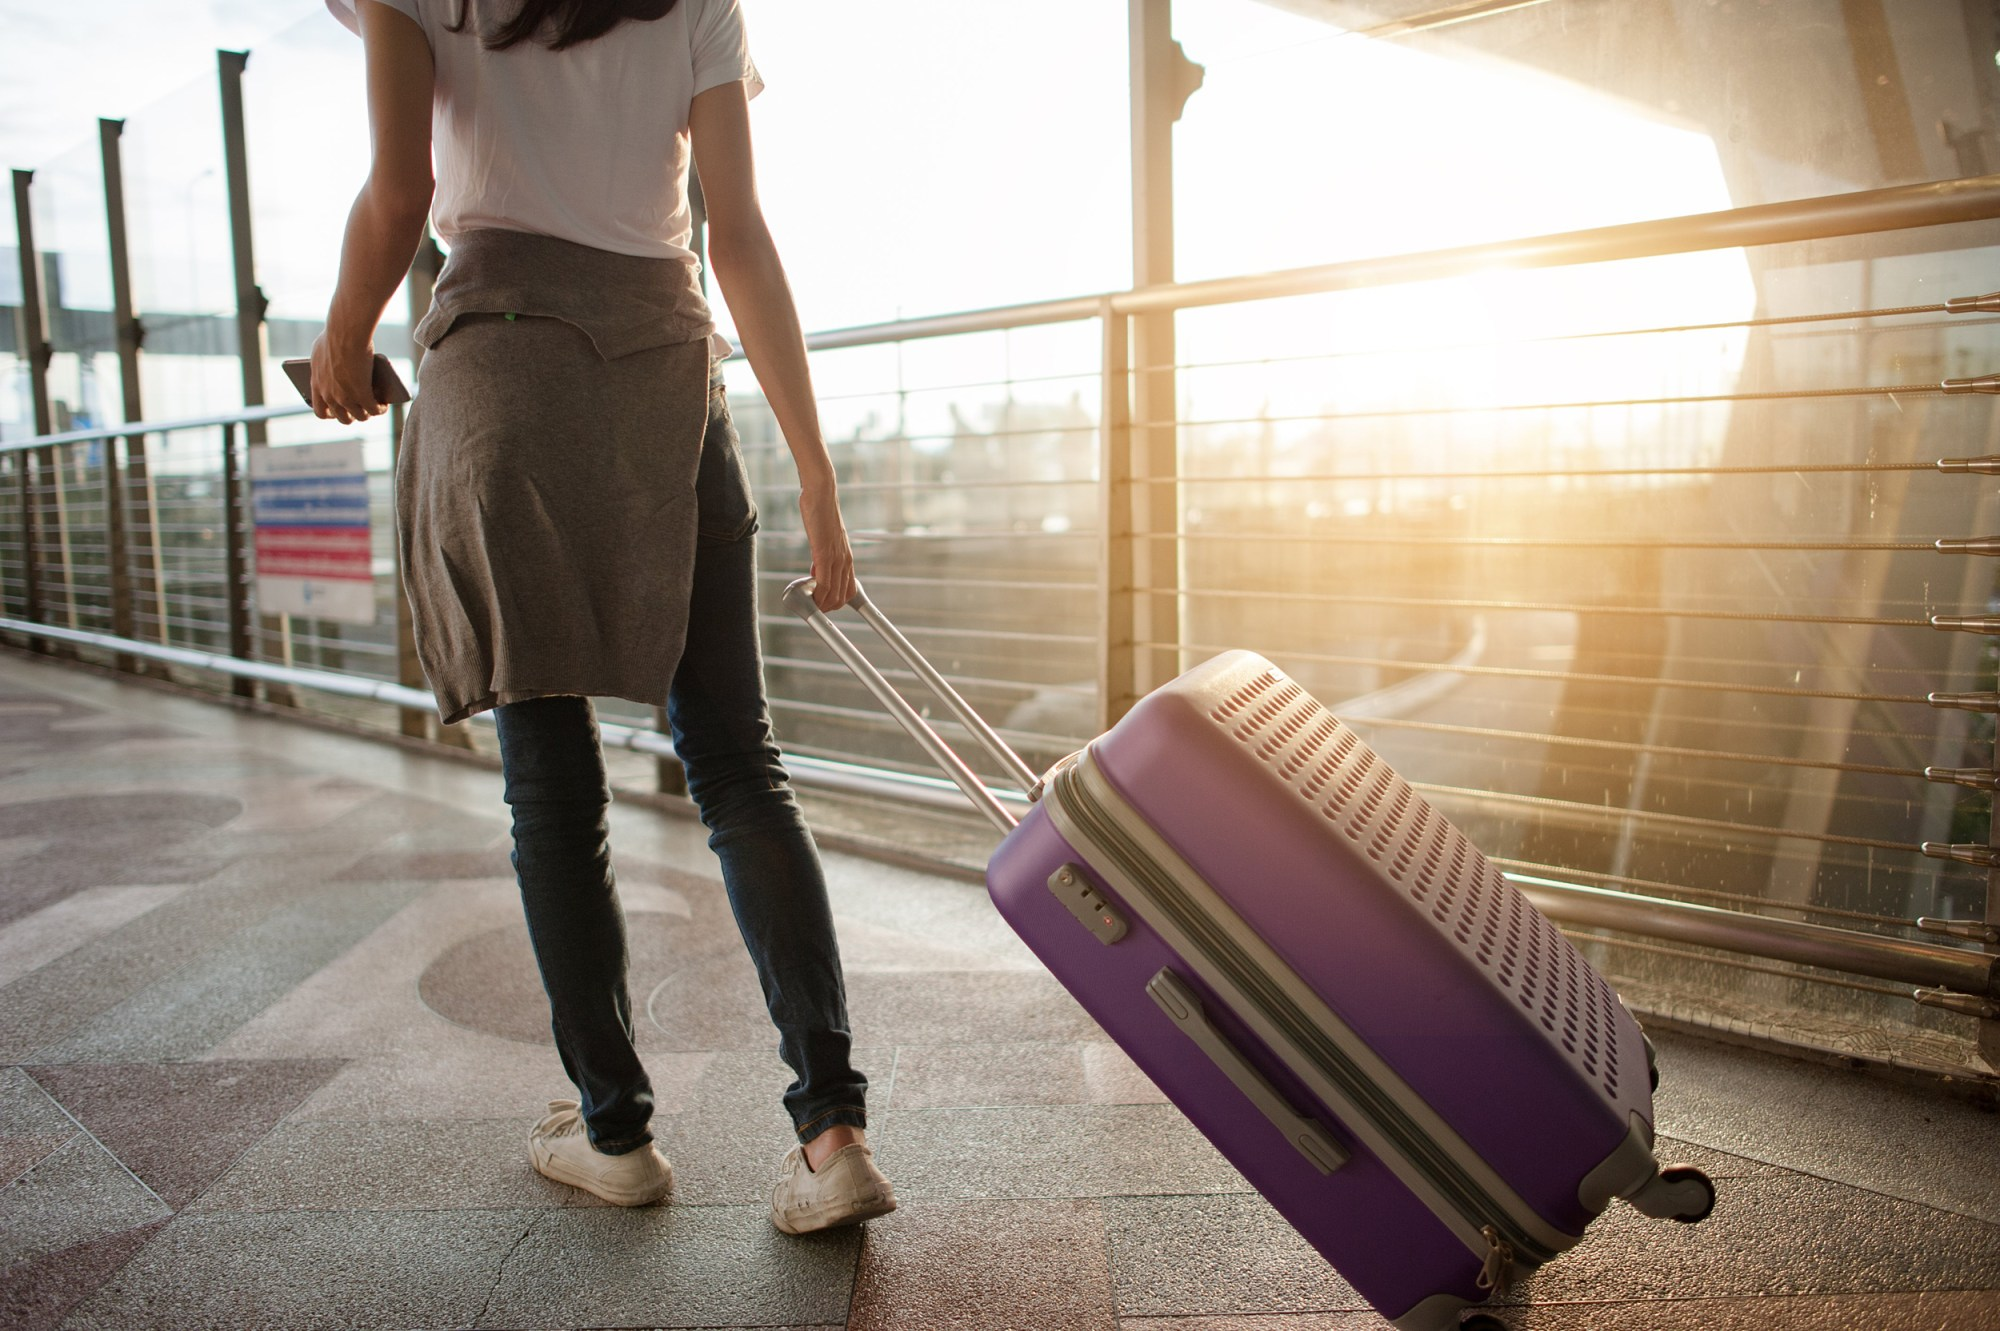

## Let's Start

In [ ]:
##import all your libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
##read data
data=pd.read_csv('../input/travel-insurance-prediction-data/TravelInsurancePrediction.csv')

In [ ]:
##head of the data
data.head()

In [ ]:
##drop unnecessary columns
data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
data.shape

In [ ]:
##check null value percentage
round(data.isnull().sum()*100/data.shape[0],2)

In [ ]:
data.info()

## Convert categorical to numerics

In [ ]:

data['Employment Type']=data['Employment Type'].map({'Private Sector/Self Employed':1,'Government Sector':0})
data['GraduateOrNot']=data['GraduateOrNot'].map({'Yes':1,'No':0})

In [ ]:
data['FrequentFlyer']=data['FrequentFlyer'].map({'No':0,'Yes':1})

In [ ]:
data['EverTravelledAbroad']=data['EverTravelledAbroad'].map({'No':0,'Yes':1})

In [ ]:
data.head()

## Let's do some EDA
### Univariate Analysis

### 1. TravelInsurance

In [ ]:
sns.countplot(data['TravelInsurance'],palette="Set3")
plt.xlabel('TravelInsurance')
plt.ylabel('count')
plt.show()

- we have data of more number of people who did not bought the travelinsurance

### 2. EverTravelledAbroad

In [ ]:
sns.countplot(data['EverTravelledAbroad'],palette="husl")
plt.show()

- we have more more data of customers who are not traveled abroad 

### 3.ChronicDiseases

In [ ]:
sns.countplot(data['ChronicDiseases'])
plt.show()

- we have more data of customers who don't have chronicdisease

### 4. FrequentFlyer

In [ ]:
sns.countplot(data['FrequentFlyer'],palette='Paired')

- we have more data of customers who don't frequently fly

### 5. GraduateOrNot

In [ ]:
sns.countplot(data['GraduateOrNot'])

- we have more data of customers who completed their graduation

### Corelation between all variables

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

- look's like travel insurance column is positively corelated with evertraveled abroad column

## Bivariate analysis
### 1. TravelInsurance & Age

In [ ]:
sns.boxplot(data['TravelInsurance'],data['Age'])
plt.show()

### 2. GraduateOrNot & TravelInsurance

In [ ]:
sns.countplot(data['GraduateOrNot'],hue=data['TravelInsurance'])
plt.show()

- look's like graduates are more tend to buy travelinsurance

### 3. FamilyMembers & TravelInsurance

In [ ]:
sns.countplot(data['FamilyMembers'],hue=data['TravelInsurance'],palette='magma')
plt.show()

### 4. FrequentFlyer & TravelInsurance

In [ ]:
sns.countplot(data['FrequentFlyer'],hue=data['TravelInsurance'])
plt.show()

### cheking all variables

In [ ]:
for i in data.columns:
    if i!='TravelInsurance':
        plt.figure(figsize=(10,5))
        sns.countplot(data[i],hue=data["TravelInsurance"],palette="Set2")
        plt.show()

    

### divide into X and y

In [ ]:
##independent variabels
X=data.drop('TravelInsurance',axis=1)

In [ ]:
##target variabl
y=data['TravelInsurance']


In [ ]:
#check classses
y.value_counts()

### Train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42,shuffle=True)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

## RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier(n_estimators=500,max_features=5,min_samples_split=50)

In [ ]:
rfc.fit(X_train,y_train)

In [ ]:
##make predictions
y_test_pred=rfc.predict(X_test)

In [ ]:
##check model performance
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test_pred,y_test))

In [ ]:
from sklearn import metrics
metrics.roc_auc_score(y_test_pred,y_test)

In [ ]:
metrics.accuracy_score(y_test_pred,y_test)

In [ ]:
##confusion matrix 
metrics.confusion_matrix(y_test_pred,y_test)

## Adaboost classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base= DecisionTreeClassifier(max_depth=3) ##base with depth 3

In [ ]:
abc=AdaBoostClassifier(base_estimator=base,n_estimators=300)

In [ ]:
abc.fit(X_train,y_train)

In [ ]:
y_pred=abc.predict(X_test)

In [ ]:
print(classification_report(y_pred,y_test))

In [ ]:
metrics.roc_auc_score(y_pred,y_test)

In [ ]:
metrics.confusion_matrix(y_pred,y_test)